### DataSet Overview and Basic stats

In [1]:
#importing the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv("train_0OECtn8.csv")

In [3]:
data.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [4]:
#basic stats about data
print("Number of data points in train data", data.shape)
print('-'*50)
print("The attributes of data :",data.columns.values)


Number of data points in train data (89197, 10)
--------------------------------------------------
The attributes of data : ['row_id' 'user_id' 'category_id' 'video_id' 'age' 'gender' 'profession'
 'followers' 'views' 'engagement_score']


In [5]:
#data types of the features
data.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [6]:
#statistical summary of features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,89197.0,44599.000000,25749.100318,1.0,22300.0,44599.00,66898.00,89197.0
user_id,89197.0,13881.909806,8005.582771,1.0,6945.0,13892.00,20819.00,27734.0
category_id,89197.0,18.323733,11.675154,1.0,8.0,16.00,26.00,47.0
video_id,89197.0,77.715383,48.469656,1.0,34.0,76.00,120.00,175.0
age,89197.0,24.848616,8.955535,10.0,18.0,23.00,32.00,68.0
followers,89197.0,252.460172,46.094468,160.0,230.0,240.00,280.00,360.0
views,89197.0,502.980268,268.569482,30.0,229.0,467.00,714.00,1000.0
engagement_score,89197.0,3.487797,0.863498,0.0,2.9,3.71,4.15,5.0


## Observation

### 1.from min and max values of features we come to know that features lie in certain range i.e age lies between 10 to 68 and so on.
### 2.the mean and median i.e 50 percentile values are almost same for all features except views but not much difference is there.But we can examine if there are any outliers present or not.
### 3.Dispersion of all the features are different.

In [7]:
#checking full information of each feature i.e checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB




There are no null values present in features

In [8]:
#checking if there are any duplicate rows present in dataset
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [row_id, user_id, category_id, video_id, age, gender, profession, followers, views, engagement_score]
Index: []


There are no duplicate rows found in dataset

## Feature wise Analysis / Univariate Analysis

In [9]:
#age
#statistical summary of feature
print(data['age'].describe())

count    89197.000000
mean        24.848616
std          8.955535
min         10.000000
25%         18.000000
50%         23.000000
75%         32.000000
max         68.000000
Name: age, dtype: float64


## Observation
### 1. Since mean and median i.e 50% percentile does not have much difference almost same so we can confirm there are no outliers present
### 2. The age range lies between 24 to 68

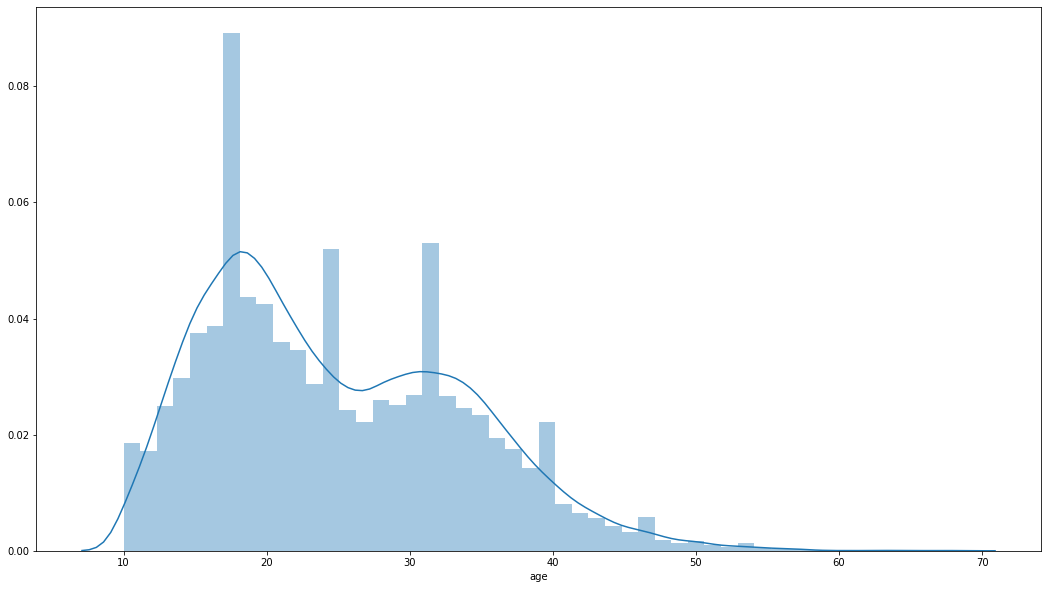

In [14]:
#distribution of age feature
fig = plt.gcf()
fig.set_size_inches(18, 10)
sns.distplot(data['age'])

## Observation
### 1.Distribution is slightly right skewed but not much. The age between 15 to almost 35 are high in numbers.
### 2. The age between 15 to 20 are very high in numbers.


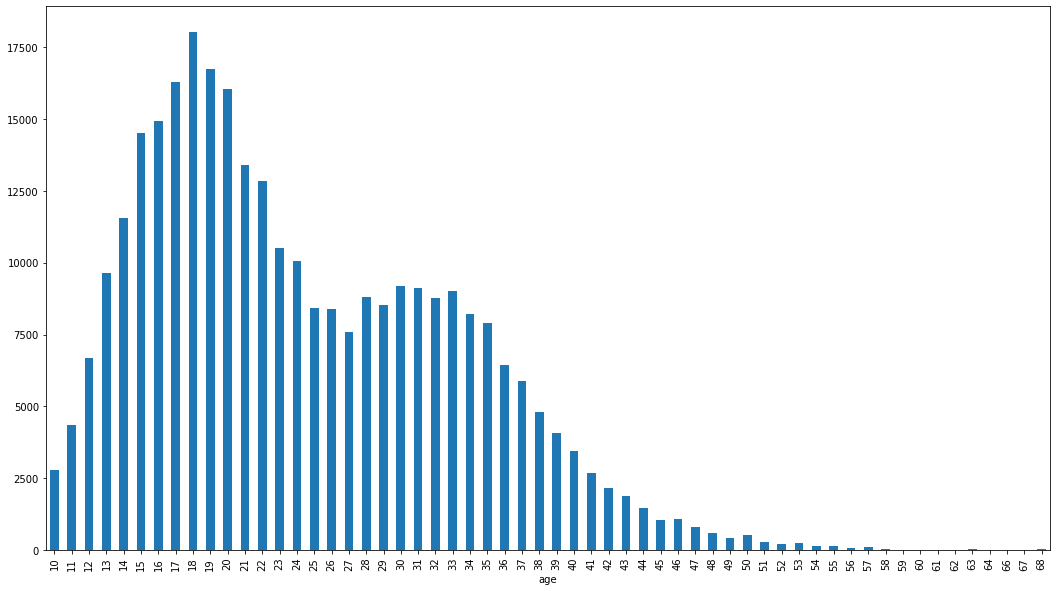

In [17]:
fig = plt.gcf()
fig.set_size_inches(18, 10)
group = data.groupby('age')['engagement_score'].sum().plot.bar()

The age between 16 to 20 have high engagement score

In [18]:
#category_id
data['category_id'].describe()

count    89197.000000
mean        18.323733
std         11.675154
min          1.000000
25%          8.000000
50%         16.000000
75%         26.000000
max         47.000000
Name: category_id, dtype: float64

Category_id lies in range of 1 to 47
since mean and median are almost same there are no outliers present.

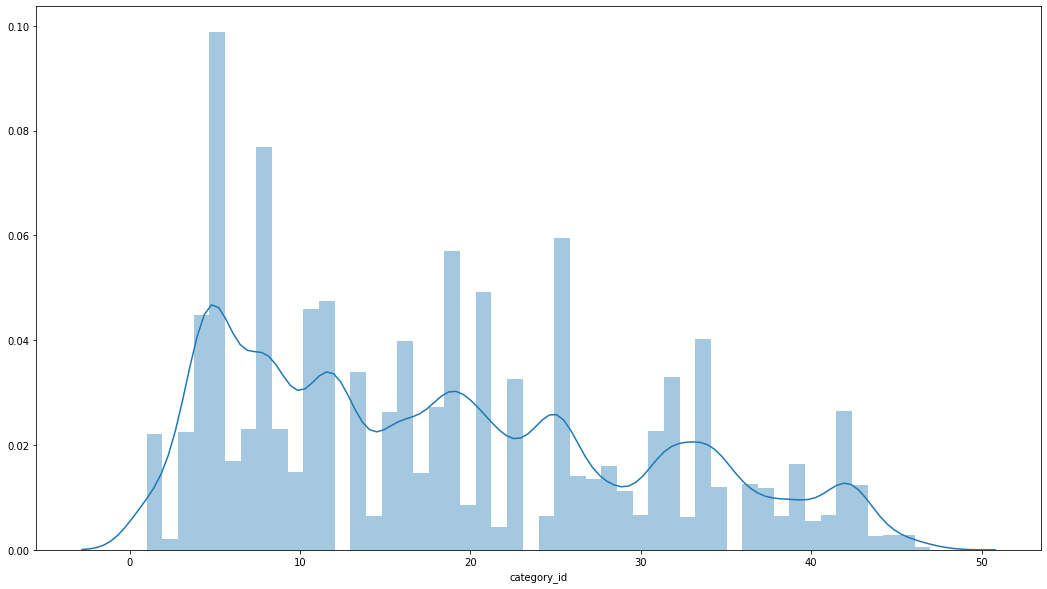

In [19]:
#checking distribution of category_id
fig = plt.gcf()
fig.set_size_inches(18, 10)
sns.distplot(data['category_id'])


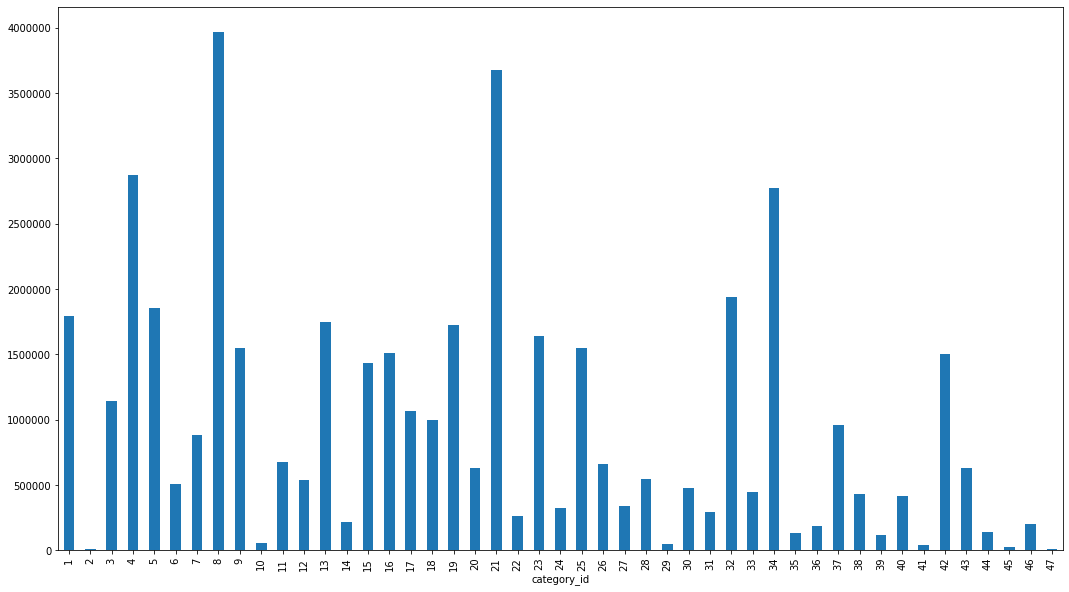

In [20]:
#checking which category_id has highest views
fig = plt.gcf()
fig.set_size_inches(18, 10)
group = data.groupby('category_id')['views'].sum().plot.bar()

category 8,24 and 31 have highest number of views

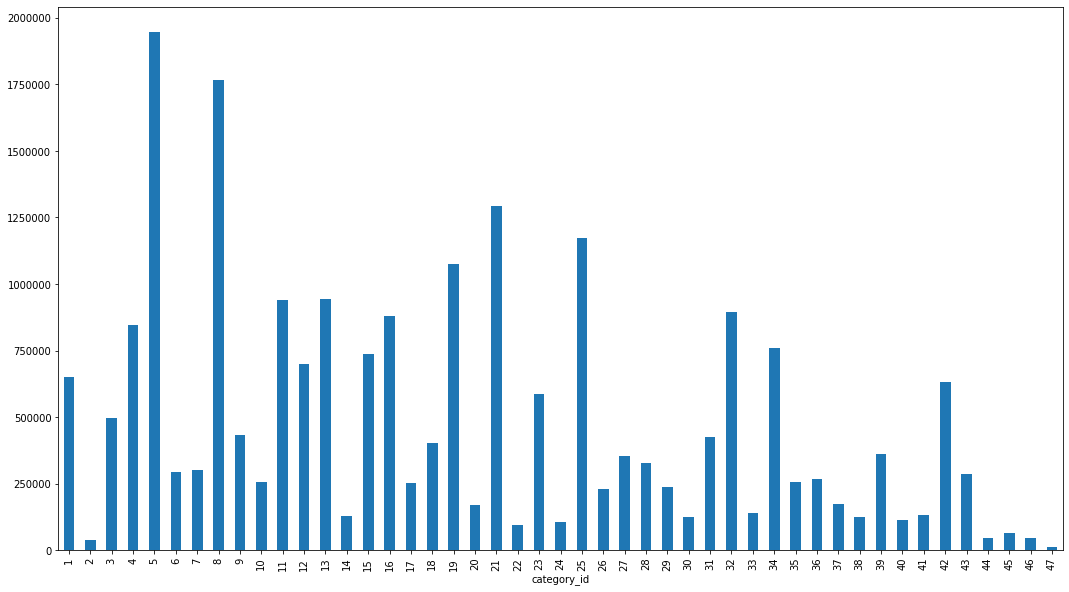

In [26]:
#checking which category_id has highest followers
fig = plt.gcf()
fig.set_size_inches(18, 10)
group = data.groupby('category_id')['followers'].sum().plot.bar()

category 5,8 and 21 have highest followers

In [27]:
#gender
data['gender'].describe()

count     89197
unique        2
top        Male
freq      52397
Name: gender, dtype: object

The percentage of male and female population is


Male      58.743007
Female    41.256993
Name: gender, dtype: float64

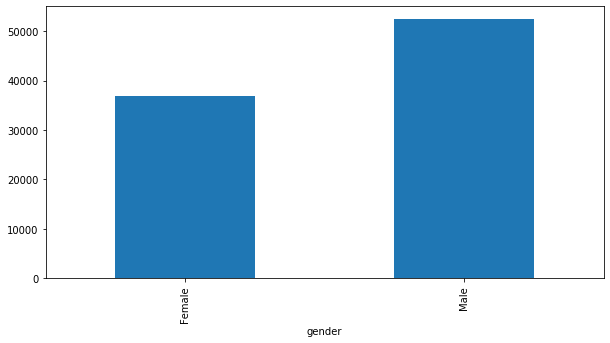

In [35]:
#checking distribution
fig = plt.gcf()
fig.set_size_inches(10, 5)
group = data.groupby('gender')['gender'].count().plot.bar()
print("The percentage of male and female population is")
data['gender'].value_counts() / data.shape[0] * 100

Male population is higher than female population 

In [36]:
#profession
data['profession'].describe()

count       89197
unique          3
top       Student
freq        44638
Name: profession, dtype: object

The percentage of student,Other and working professional is


Student                 50.044284
Other                   30.090698
Working Professional    19.865018
Name: profession, dtype: float64

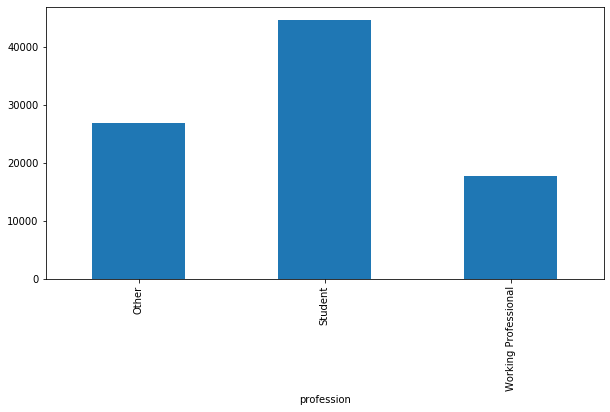

In [38]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
group = data.groupby('profession')['profession'].count().plot.bar()
print("The percentage of student,Other and working professional is")
data['profession'].value_counts() / data.shape[0] * 100

Student population is more than working professional and others

In [39]:
#followers
data['followers'].describe()

count    89197.000000
mean       252.460172
std         46.094468
min        160.000000
25%        230.000000
50%        240.000000
75%        280.000000
max        360.000000
Name: followers, dtype: float64

Mean and median are slightly different we can confirm if there are any outliers present or not through boxplots

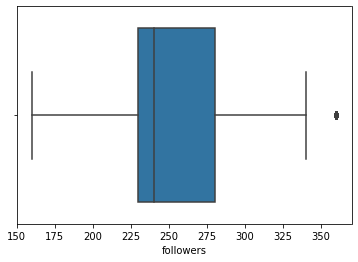

In [40]:
#boxplot
sns.boxplot(data['followers'])

In [44]:
#we can check outliers by percentiles
array = np.array(data['followers'])
for i in range(0,101,10):
    print("{} percentile value is {}".format(i,np.percentile(array,i)))

0 percentile value is 160.0
10 percentile value is 180.0
20 percentile value is 230.0
30 percentile value is 230.0
40 percentile value is 240.0
50 percentile value is 240.0
60 percentile value is 250.0
70 percentile value is 270.0
80 percentile value is 280.0
90 percentile value is 330.0
100 percentile value is 360.0


There is slight difference between 90 and 100th percentile values will check all the values between 90 to 100 percentile values

In [45]:
for i in range(90,101):
    print("{} percentile value is {}".format(i,np.percentile(array,i)))

90 percentile value is 330.0
91 percentile value is 330.0
92 percentile value is 330.0
93 percentile value is 340.0
94 percentile value is 340.0
95 percentile value is 340.0
96 percentile value is 340.0
97 percentile value is 340.0
98 percentile value is 360.0
99 percentile value is 360.0
100 percentile value is 360.0


There is no difference between 99th percentile values

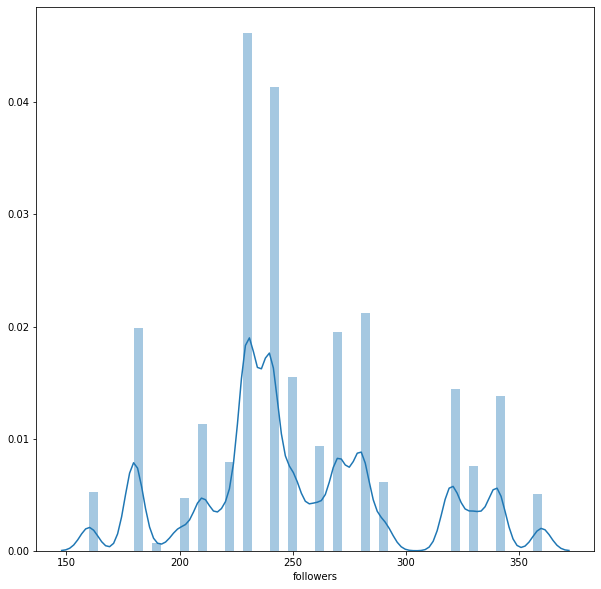

In [47]:
#checking distribution
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.distplot(data['followers'])

In [48]:
#views
data['views'].describe()

count    89197.000000
mean       502.980268
std        268.569482
min         30.000000
25%        229.000000
50%        467.000000
75%        714.000000
max       1000.000000
Name: views, dtype: float64

Since mean and median are slightly different we can compute percentile values to check if there are any outliers present or not

In [49]:
arr = np.array(data['views'])

In [50]:
for i in range(0,101,10):
    print("{} percentile value is {}".format(i,np.percentile(arr,i)))

0 percentile value is 30.0
10 percentile value is 138.0
20 percentile value is 229.0
30 percentile value is 317.0
40 percentile value is 369.0
50 percentile value is 467.0
60 percentile value is 628.0
70 percentile value is 662.0
80 percentile value is 781.0
90 percentile value is 884.0
100 percentile value is 1000.0


In [51]:
#checking for 99th percentile values
for i in range(90,101):
    print("{} percentile value is {}".format(i,np.percentile(arr,i)))

90 percentile value is 884.0
91 percentile value is 884.0
92 percentile value is 900.0
93 percentile value is 909.0
94 percentile value is 909.0
95 percentile value is 909.0
96 percentile value is 909.0
97 percentile value is 990.0
98 percentile value is 990.0
99 percentile value is 1000.0
100 percentile value is 1000.0


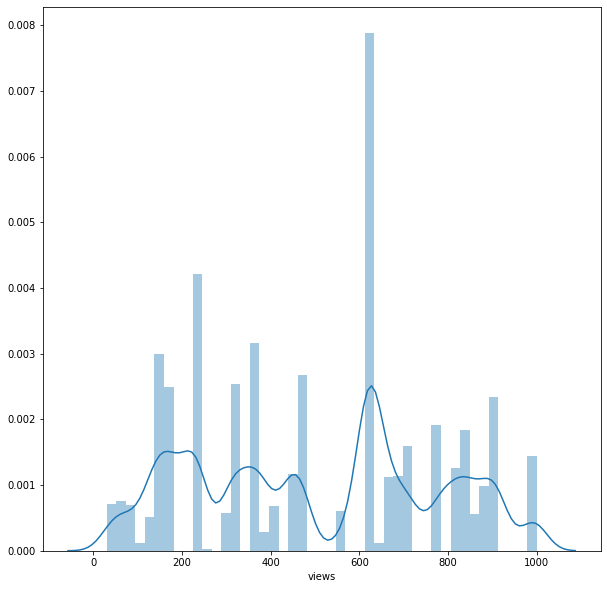

In [53]:
#checking distribution
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.distplot(data['views'])

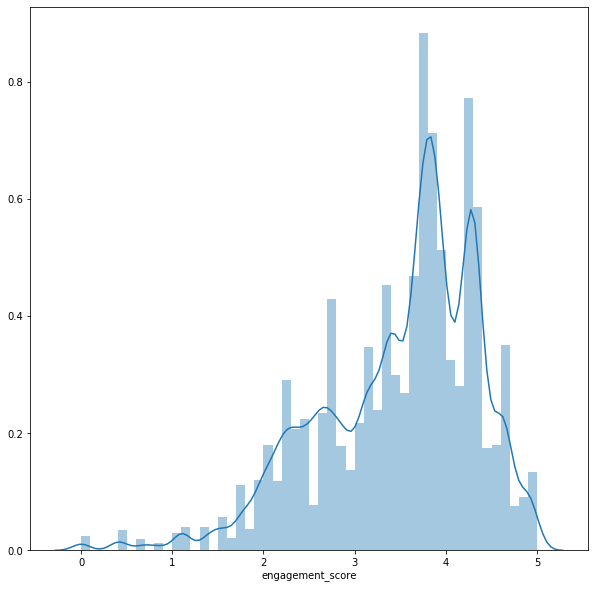

In [55]:
#checking the distribution of target variable i.e engagement score
fig = plt.gcf()
fig.set_size_inches(10, 10)
sns.distplot(data['engagement_score'])

Looks like Guassian curve with left skewed

In [59]:
#looking at relationship between features and target variable
#correlation is the best measure 
fig = plt.figure(figsize=(8,8))
data.corr()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006953,0.002833,0.000891,-0.005199,-0.001374,-0.001815,-0.003368
user_id,-0.006953,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900
category_id,0.002833,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288
video_id,0.000891,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552
age,-0.005199,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626
followers,-0.001374,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855
views,-0.001815,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679
engagement_score,-0.003368,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000


<Figure size 576x576 with 0 Axes>

followers have positive correlation for target variable

In [60]:
#reading test data
test_data = pd.read_csv('test_1zqHu22.csv')

In [61]:
test_data.head(5)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [62]:
#separating dependent and independent variables
y = data['engagement_score']
x = data.drop('engagement_score',axis=1)

In [63]:
x.shape

(89197, 9)

## Data Preprocessing

In [107]:
#followers column standardizing
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_followers = s.fit_transform(x['followers'].values.reshape(-1,1))
x_test_followers = s.transform(test_data['followers'].values.reshape(-1,1))

In [108]:
#views column standardizing
v = StandardScaler()
x_train_views = v.fit_transform(x['views'].values.reshape(-1,1))
x_test_views = v.transform(test_data['views'].values.reshape(-1,1))


In [109]:
#profession is a categorical variable so one hot encoding is required
from sklearn.preprocessing import LabelEncoder
o = LabelEncoder()
x_train_profession = o.fit_transform(x['profession'].values)
x_test_profession = o.transform(test_data['profession'].values)

In [110]:
#gender one hot encoding
g = LabelEncoder()
x_train_gender= g.fit_transform(x['gender'].values)
x_test_gender= g.transform(test_data['gender'].values)

In [111]:
#label encoding age
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
x_train_age = l.fit_transform(x['age'].values)
x_test_age = l.transform(test_data['age'].values)

In [135]:
d = x_train_views.flatten()
x_train_followers.ndim

2

In [136]:
x_tr = pd.DataFrame(
{
    'age':x_train_age,
    'profession':x_train_profession,
    'views':x_train_views.flatten(),
    'gender':x_train_gender,
    'followers':x_train_followers.flatten()
})

In [139]:
x_tr.shape

(89197, 5)

In [140]:
x_te = pd.DataFrame(
{
    'age':x_test_age,
    'profession':x_test_profession,
    'views':x_test_views.flatten(),
    'gender':x_test_gender,
    'followers':x_test_followers.flatten()
})

In [141]:
x_te.shape

(11121, 5)

## Building Machine Learning Models

In [146]:
#applying linear regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

clf = SGDRegressor()
parameters = {'alpha':[0.001,0.0001,0.01]}
model = RandomizedSearchCV(clf,parameters,cv = 3,scoring = 'r2',return_train_score = True)
model.fit(x_tr,y)

results = pd.DataFrame.from_dict(model.cv_results_)

results.head(5)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.146608,0.005114,0.003312,0.000451,0.001,{'alpha': 0.001},0.236352,0.188259,0.175338,0.199983,0.026252,1,0.222398,0.191401,0.178821,0.197540,0.018312
1,0.121357,0.007094,0.002990,0.000004,0.0001,{'alpha': 0.0001},-0.115981,0.205836,0.220993,0.103616,0.155402,3,-0.122195,0.213341,0.229529,0.106892,0.162123
2,0.126660,0.026701,0.002994,0.000002,0.01,{'alpha': 0.01},0.170543,0.213354,0.161441,0.181780,0.022634,2,0.158888,0.217546,0.175156,0.183863,0.024726


Best alpha value is 0.001

In [149]:
#building linear regression model with alpha = 0.001
reg_model = SGDRegressor(alpha = 0.001)
reg_model.fit(x_tr,y)

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [150]:
print("r2-score is {}".format(reg_model.score(x_tr,y)))

r2-score is 0.22476411305331034


In [151]:
predicted_value = model.predict(x_te)

In [154]:
predicted_value

array([4.02734067, 3.86290815, 2.12073179, ..., 3.71809364, 3.38179245,
       3.20878537])

In [155]:
submission  = pd.DataFrame({
    'row_id':pd.Series(test_data['row_id']),
    'engagement_score':pd.Series(predicted_value)
})

In [157]:
submission.to_csv('Submission.csv',index = False)